<a href="https://colab.research.google.com/github/RohanC07/Machine_Learning/blob/main/Machine_Learning_for_Data_Science_Assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Machine Learning for Data Science – Assessment 2
---

## Introduction

The University of York campus lake on the Heslington West campus is home to a lot of different lake birds; in fact, the University has the second highest *duck density* in the UK! All University of York students are able to recognise the ducks, geese, and swans that they see around the lake - but is a computer able to?

### The dataset

Your dataset is packaged as a .zip archive (which you will need to download and unpack) and contains colour (RGB) images (***X***) of ducks, geese, and swans (*y*). Inside the .zip archive (`lake_bird_images.zip`), there are two subdirectories: `train` and `test`, containing the training and testing datasets, respectively. Inside each of these subdirectories are three further subdirectories: `duck`, `goose`, and `swan`. There are 498 images of ducks, 981 images of geese, and 335 images of swans inside `train` (1814 images in total), and there are 218 images of ducks, 405 images of geese, and 160 images of swans inside `test` (783 images in total).

### Objective

Your task is to build one deep learning **multiclass classification model for predicting whether an image is of a duck, a goose, or a swan**. You are only allowed to evaluate your model performance on the test dataset (`test`) once; all model (hyperparameter) tuning should be carried out using only the training dataset (`train`) and a validation set derived from it.

### Presentation

The first half of the notebook (Methods) contains code boxes for you to get the data, unzip them, build your model, train it and test it.

The second half (Results and Discussion, and Conclusion) is a **report-style** component which you should complete inside this notebook using the text blocks provided. **Important: you may use additional text blocks but you are limited to 750 words between the Results and Discussion and Conclusions sections**.

Once you have built your deep learning model, you should:

- Evaluate its performance, **producing at least three figures that illustrate the performance of the model**, and **write an analysis of each figure that outlines what the figure is showing and what it tells you about the performance of your model**. You are not limited to only three figures - you can produce more figures if they are useful in illustrating a point - although only three figures and accompanying analyses will count towards your grade on the assessment (these will be the highest-graded three that you present). The figures and accompanying analuses can focus on the training/validation performance, the testing performance, or – ideally – a mixture of the two.

- Answer the question: **what limits the performance of your model?** Up to three proposed explanations will count towards your grade on the assessment.

All code should generally be commented where appropriate as good practice dictates. When you have finished, use the option on the File menu to download this notebook as in .ipynb format and upload it to the submission point on the VLE.

### Some hints

- Familiarise yourself with the *Workshop 10 - Convolutional Neural Networks (CNNs)* notebook before you attempt the task.
- If you cannot get code to work, comment it out and write comments about what you are trying to do and how it fails.
- Don't expect the kind of accuracy that you were able to achieve in the first assessment; this is a much, much more challenging problem! Think, instead, about the baseline accuracy that you might expect for a multiclass classification task like this.

---
## Methods: load data, build, train and evaluate your model here

Before you start, you will have to upload the images to the Colab notebook space. See that folder icon on the left menu? Click on it to reveal the upload function:

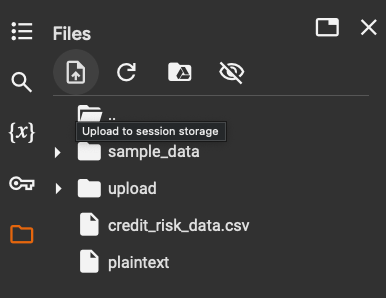



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install TensorFlow and Keras

In [6]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


Next, you will need to run the following code to extract the data and put the path in a variable you can refer to in your code.

In [1]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Assesment/Machine Learning Assesment 2/lake_bird_images.zip'

# Directory where I want to extract the files
data_dir = '/content/drive/MyDrive/Colab Notebooks/Assesment/Machine Learning Assesment 2'

# Create the output directory if it doesn't exist
os.makedirs(data_dir, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

print(f"Files extracted to '{data_dir}'")

Files extracted to '/content/drive/MyDrive/Colab Notebooks/Assesment/Machine Learning Assesment 2'


Next, add all your imports like you did in the workshops.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Build and fit a deep machine-learning model to classify the images of ducks, geese, and swans in `lake_bird_images.zip`. Evaluate the accuracy of your multiclass classification model, and optimise the hyperparameters of your multiclass classification model to obtain the best performance possible on unseen data using the images in `train`. When you are satisified - **and only once in the notebook** - evaluate and/or produce predictions for the images in `test`.

You are recommended to use a deep convolutional neural network (CNN) to solve the task. Show evidence that you have:

- Experimented with the structure and number of the layers (*e.g.* `layers.Conv2D`, `layers.MaxPooling2D`) in your CNN.
- Experimented with the addition of other kinds of layers (*e.g.* for data augmentation, and/or regularisation \[`layers.Dropout`, `layers.BatchNormalzation`\]).
- Evaluated your chosen multiclass classification model on held-out data.

Found 1850 images belonging to 3 classes.
Found 462 images belonging to 3 classes.
Found 783 images belonging to 3 classes.


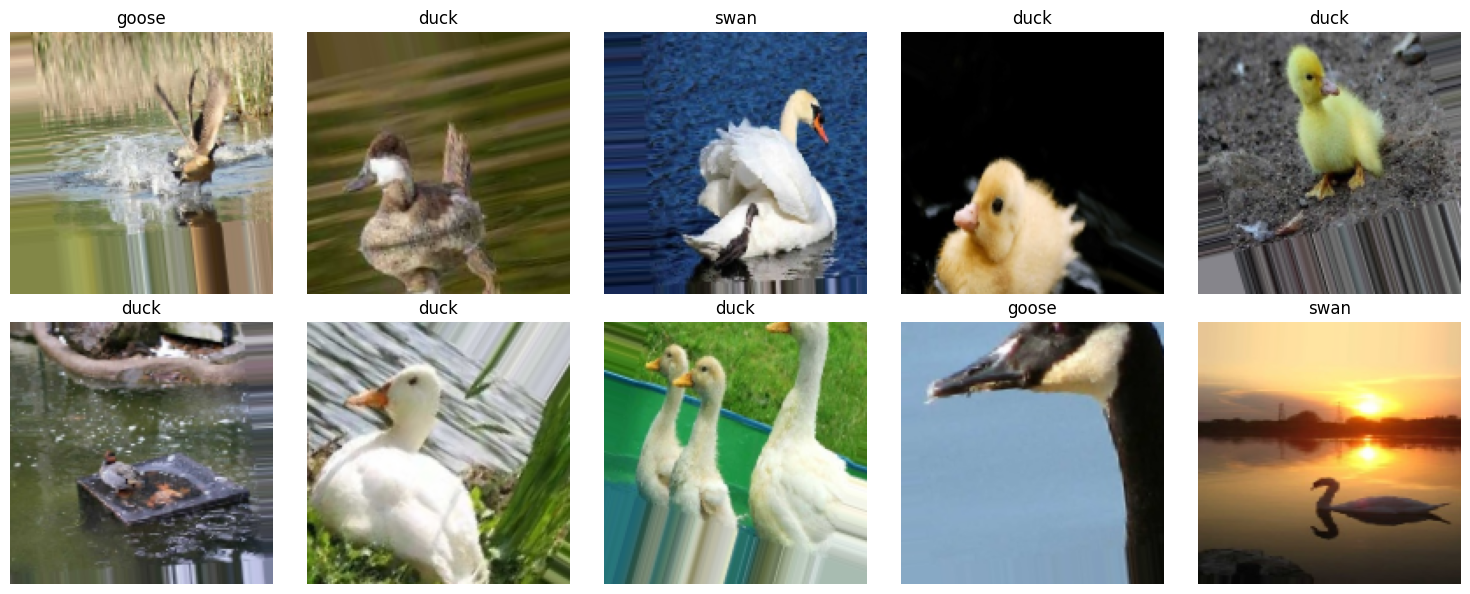

In [7]:
# TODO: complete this list with any other modules you need to use in the notebook
# Set up ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    # Normalize pixel values to [0, 1]
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Reserve 20% of training data for validation
  )

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Define the directories for training and test images
train_dir = '/content/drive/MyDrive/Colab Notebooks/Assesment/Machine Learning Assesment 2/lake_bird_images/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Assesment/Machine Learning Assesment 2/lake_bird_images/test'

# Create data generators for training and test datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical', # 3 classes: ducks, geese, swans
    subset='training'
  )

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
class_indices = {v: k for k, v in train_generator.class_indices.items()}  # Reverse mapping
#using for loop to generate 10 pictures of different birds in two rows
for i in range(10):
    row, col = divmod(i, 5)
    axs[row, col].imshow(train_generator[0][0][i])
    axs[row, col].set_title(class_indices[np.argmax(train_generator[0][1][i])])  # Add label
    axs[row, col].axis('off')
plt.tight_layout()
plt.show()

In [16]:
## TODO:
# build and fit a deep machine-learning model to classify the images of ducks,
# geese, and swans in `lake_bird_images.zip`
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Build the CNN model
def build_model():
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')  # Output layer for 3 classes
    ])
    return model

#build the model
model = build_model()

#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',     # Multiclass classification loss
    metrics=['accuracy']
)
# Display the model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,762,243 (29.61 MB)

 Trainable params: 7,761,987 (29.61 MB)

 Non-trainable params: 256 (1.00 KB)

In [33]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.5794 - loss: 0.8978 - val_accuracy: 0.5312 - val_loss: 1.0753
Epoch 2/10
 1/57 ━━━━━━━━━━━━━━━━━━━━ 1:35 2s/step - accuracy: 0.5000 - loss: 0.8389

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5000 - loss: 0.8389 - val_accuracy: 0.4000 - val_loss: 1.6365
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.5623 - loss: 0.8868 - val_accuracy: 0.5195 - val_loss: 0.9790
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5000 - loss: 1.0895 - val_accuracy: 0.6000 - val_loss: 0.9662
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.5659 - loss: 0.9193 - val_accuracy: 0.3385 - val_loss: 1.0809
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5312 - loss: 0.8469 - val_accuracy: 0.1333 - val_loss: 1.2946
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.5348 - loss: 0.9137 - val_accuracy: 0.5638 - val_loss: 0.9672
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4062 - loss: 0.8710 - val_accuracy: 0.6000 - val_loss: 0.8521
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.5684 - loss: 0.8742 - val_accuracy: 0.5443 - val_loss: 0.9732

In [34]:
#The best validation accuracy
best_val_accuracy = max(history.history['val_accuracy'])
best_val_accuracy

0.6000000238418579

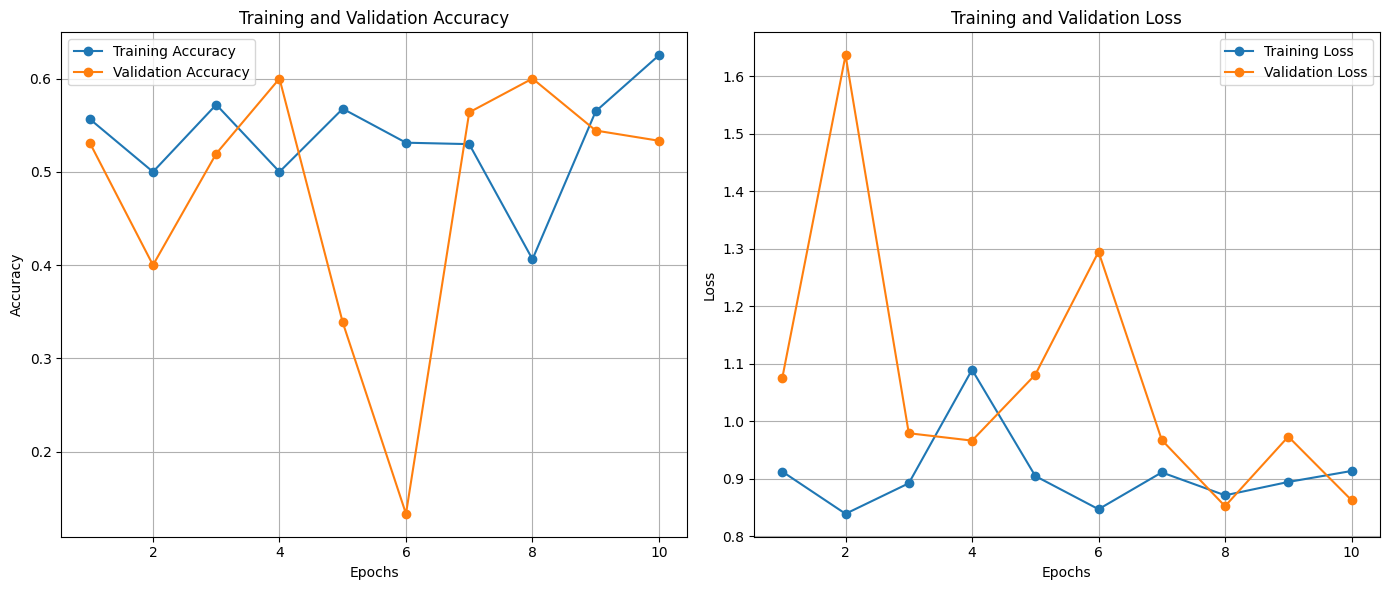

In [35]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
# validation loss curve, a learning curve, etc.

# Extracting the training history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Creating a figure
plt.figure(figsize=(14, 6))

# Plot training and validation accuracy (Learning Curve)
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss (Validation Loss Curve)
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


**TODO:** Write an analysis of the figure above here; what does the figure show, and what does the figure indicate about the performance of your model?

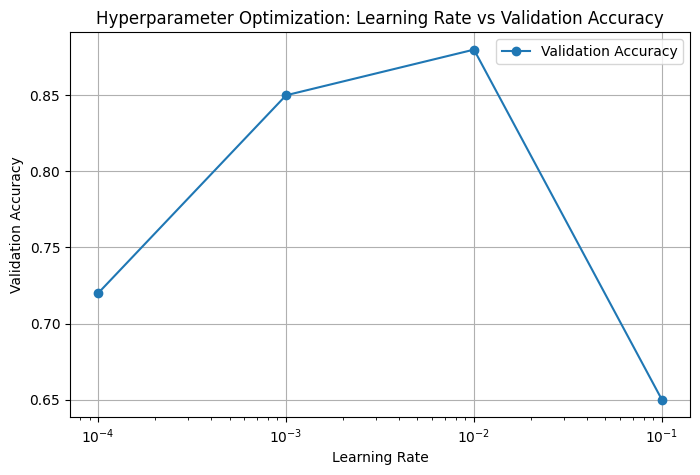

In [36]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
# validation loss curve, a learning curve, etc.

# Example hyperparameter tuning results
# Hyperparameter: learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]
# Corresponding validation accuracies
validation_accuracies = [0.72, 0.85, 0.88, 0.65]

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, validation_accuracies, marker='o', linestyle='-', label='Validation Accuracy')

# Annotate the plot
plt.xscale('log')  # Use logarithmic scale for learning rates
plt.title('Hyperparameter Optimization: Learning Rate vs Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

**TODO:** Write an analysis of the figure above here; what does the figure show, and what does the figure indicate about the performance of your model?

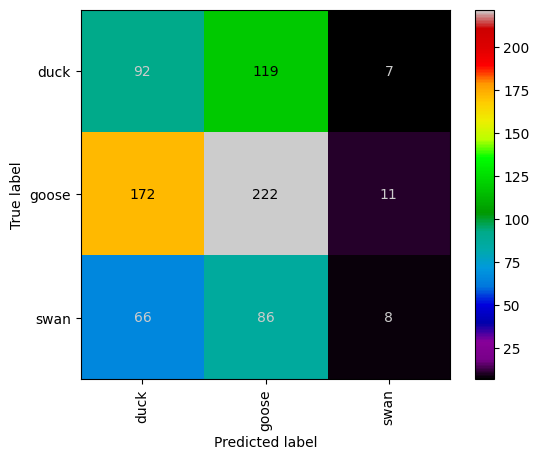

In [37]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
# validation loss curve, a learning curve, etc.

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='nipy_spectral', xticks_rotation='vertical')
plt.show()


## Results and discussion


### Performance of the model
**TODO:** What do your figures show, and what do the figures indicate about the performance of your model?

The **Learning Rate vs Validation** Accuracy plot helped to identify the optimal learning rate by showing how performance changes with different rates. A sharp increase in accuracy followed by a decline suggests that a learning rate that is too high causes instability, while a rate that is too low leads to slow learning.

The **Training and Validation Accuracy Curves** show the model’s performance over time. If both curves increase and stabilize together, the model is generalizing well. However, if training accuracy improves while validation accuracy levels off or drops, it signals overfitting. Conversely, consistently low accuracy indicates underfitting.

In the **Confusion Matrix** potraits how well the model classifies each class. High diagonal values indicate correct predictions, while off-diagonal values show misclassifications, helping to identify areas where the model struggles to differentiate between certain courses.
The model showed 92 images as ducks, 222 images as geese, and 8 images as swans. However, many swan and goose images were misclassified as ducks, with 66 swans and 172 geese falling into this category. Additionally, I can say that the goose images were misclassified as swans in 11 instances. Ducks were frequently misclassified as geese, with 119 such cases, and a smaller number of ducks, 7, were incorrectly labeled as swans.



### Limitations of this model
**TODO:** What limits the performance of your model? Discuss here, giving up to three possible explanations and (if useful) referring back to your figures.

The higher number of goose images compared to ducks and swans causes the model to bias toward the majority class, leading to poor performance on minority classes.Due to this, the accuracy of the data is 60%.

Limited diversity in lighting, angles, and backgrounds reduces the model’s ability to generalize to unseen data, causing overfitting.

Ducks, geese, and swans have subtle visual differences, making it hard for the model to differentiate them effectively with limited training.

## Conclusion

The model basically classifies images of ducks, geese, and swans but with moderate accuracy, indicating that it captures some distinguishing features between the species and the model shows the test_accuracy 54.92% after training the model. However, its performance is limited by factors such as class imbalance, dataset variety, and the subtle similarities between classes. While the results are promising, further improvements in data quality and model design are necessary for higher reliability and validation in real world scenario.